# MNIST Dataset Notebook
## What is MNIST?
The MNIST (Modified National Institute of Standards and Technology) database is a large database of handwritten digits used for training image processing systems. This database is also commonly used in machine learning
___

## How was it created?
Samples from NIST's datasets were remixed and then normalized to fit into a 28x28 pixel grayscale images.

**[The dataset consists of:](https://corochann.com/mnist-dataset-introduction-1138.html)**
1. Image - this is a **list** of unsigned bytes. <br>
   The bytes array results from the image list need to be turned into a list [(hence why *list()* is included in reshaping the image)]((https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python/40430149))
    * What is it? <br>
       This is 28x28 (784 pixels) grayscale image of a handwritten number.
       
2. Label - this is an **array** of unsigned bytes
    * What is it? <br>
      This is a representation of the digit from the image, ranging between numbers 0 to 9.
___

## How to convert the content from bytes to integers
1. Visit [this website](http://yann.lecun.com/exdb/mnist/)
2. On the website, scroll down to find out more information about the content of the file you are testing
    * **underneath the heading:** FILE FORMATS FOR THE MNIST DATABASE
3. Display the integer values of the images from 0 to 16, every 4 bytes
4. If your output matches the number under the *value* column, then it is the correct output

**Note:** If the *value* is noted as two question marks - **??** - that means the output is 0

#### [The following are the data types used in this code:](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.types.html)
* **unint8** &nbsp;&nbsp;&nbsp; - Unsigned integer (0 to 255)
* **int_** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Default integer type (same as C long; normally either int64 or int32)

## Packages

In [1]:
# To extract files from the gzipped folder
import gzip

# Linear algebra
import numpy as np

# Sends HTTP requests
import requests

# Visualise data
import matplotlib.pyplot as plt
%matplotlib inline

___
# Folders from t10k

## Access gz files from urls

In [2]:
# Source code adapted from:
# - https://stackoverflow.com/questions/34561746/downloading-a-csv-gz-file-from-url-in-python
url1 = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
filename_1 = url1.split("/")[-1]

In [3]:
url2 = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
filename_2 = url2.split("/")[-1]

## Write gz files to the MNIST-dataset-notebook folder

In [4]:
with open(filename_1, "wb") as f1:    
    r1 = requests.get(url1)
    f1.write(r1.content)

In [5]:
with open(filename_2, "wb") as f2:    
    r2 = requests.get(url2)
    f2.write(r2.content)

## Read the file content from the [gzipped](http://yann.lecun.com/exdb/mnist/) folders

In [6]:
# Source code adapted from:
# - https://stackoverflow.com/questions/48257255/how-to-import-pre-downloaded-mnist-dataset-from-a-specific-directory-or-folder
# - https://docs.python.org/3/library/gzip.html

In [7]:
# Read a gzip compressed file
# Handwritten image folder
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as t10k_img:
    image_t10k = t10k_img.read()

In [8]:
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as t10k_label:
    labels_t10k = t10k_label.read()

## Handwritten Digit Image
This file is a list of bytes that can displays the image of a digit

In [9]:
# Obtain the file content type of the image_t10k folder
type(image_t10k)

bytes

In [10]:
# A subset of the array can be accessed from the bytearray by using the ":" notation
# - https://www.youtube.com/watch?v=qnKX1y7HAyE

In [11]:
# Get the first 4 bytes
image_t10k[0:4]

b'\x00\x00\x08\x03'

In [12]:
# Source code adapted from:
# - https://stackoverflow.com/questions/444591/convert-a-string-of-bytes-into-an-int-python
# - https://stackoverflow.com/questions/30402743/python-2-7-equivalent-of-built-in-method-int-from-bytes
# - https://docs.python.org/3/library/stdtypes.html
# - https://www.devdungeon.com/content/working-binary-data-python

### Convert bytes to integers in the image folders

In [13]:
# First 4 bytes
# You can use the output from the image_t10k[0:4]
int.from_bytes(b'\x00\x00\x08\x03', byteorder='big')

2051

### OR



In [14]:
# You can use image_t10k[0:4] instead of the 
# direct output since it's more efficient
int.from_bytes(image_t10k[0:4], byteorder='big')

2051

In [15]:
# Bytes 4 to 8
int.from_bytes(image_t10k[4:8], byteorder='big')

10000

In [16]:
# Bytes 8 to 12
int.from_bytes(image_t10k[8:12], byteorder='big')

28

In [17]:
# Bytes 12 to 16
int.from_bytes(image_t10k[12:16], byteorder='big')

28

In [18]:
# Bytes 16 to 17 - value being "??"
int.from_bytes(image_t10k[16:17], byteorder='big')

0

## Labels
This is a file containing an array of bytes that prints out the digit

In [19]:
# Obtain the file content type of the labels_t10k folder
type(labels_t10k)

bytes

### Convert bytes to integers in the labels folders
**Check if the numbers in the images match the number labels in each output**

In [20]:
# Source code adapted from:
# - https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb
# First 4 bytes
int.from_bytes(labels_t10k[0:4], byteorder='big')

2049

In [21]:
# Bytes 4 to 8
int.from_bytes(labels_t10k[4:8], byteorder='big')

10000

#### Why does the image show between bytes 16 and 800 and not between 0 and 784?
1. When converting  handwritten images folder from bytes 16-17 to integer you get 0
2. Image scale is 28x28 which means 800 is the the no of bytes at which the first digit image ends
3. When converting labels_t10k folder from bytes 8-9 to integer you get 7
4. Each following digit image is another 28x28 bits (784 pixels) further from the previous digit
    * Second digit is found between 800-1584 pixels

### Display number
This displays the digit between the bytes in the square brackets.

#### Output 1

In [22]:
# Bytes 15 to 16
int.from_bytes(labels_t10k[15:16], byteorder='big')

9

### Visualise
This displays the handwritten number that matches the output from the label.

#### Image 1 - Should match Output 1

In [23]:
# Source code adapted from:
# - https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot

In [24]:
# Obtain the image label from bytes 5504 to 6288 (28x28 - scale of the handwritten digit image)
image1_tk = np.array(list(image_t10k[5504:6288])).reshape(28,28).astype(np.uint8)

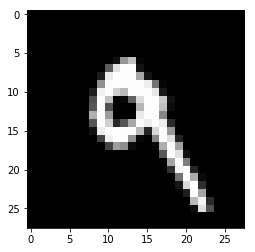

In [25]:
# Display the image of the digit
plt.imshow(image1_tk, cmap='gray')

---

# Folders from train

## Access gz files from urls

In [26]:
url3 = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
filename_3 = url3.split("/")[-1]

In [27]:
url4 = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
filename_4 = url4.split("/")[-1]

## Write gz files to the MNIST-dataset-notebook folder

In [28]:
with open(filename_3, "wb") as f3:    
    r3 = requests.get(url3)
    f3.write(r3.content)

In [29]:
with open(filename_4, "wb") as f4:    
    r4 = requests.get(url4)
    f4.write(r4.content)

## Read the file content from the [gzipped](http://yann.lecun.com/exdb/mnist/) folders

In [30]:
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as tr_img:
    image_tr = tr_img.read()

In [31]:
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as tr_label:
    labels_tr = tr_label.read()

## Handwritten Digit Image

### Convert bytes to integers in the image folders

In [32]:
# You can use image_tr[0:4] 
int.from_bytes(image_tr[0:4], byteorder='big')

2051

In [33]:
# You can use image_tr[0:4] 
int.from_bytes(image_tr[0:4], byteorder='big')

2051

In [34]:
# Bytes 4 to 8
int.from_bytes(image_tr[4:8], byteorder='big')

60000

In [35]:
# Bytes 8 to 12
int.from_bytes(image_tr[8:12], byteorder='big')

28

In [36]:
# Bytes 12 to 16
int.from_bytes(image_tr[12:16], byteorder='big')

28

In [37]:
# Bytes 16 to 17 - [value] being "??"
int.from_bytes(image_t10k[16:17], byteorder='big')

0

## Labels

### Convert bytes to integers in the labels folders
**Check if the numbers in the images match the number labels in each output**

In [38]:
# First 4 bytes
int.from_bytes(labels_tr[0:4], byteorder='big')

2049

In [39]:
# Bytes 4 to 8
int.from_bytes(labels_tr[4:8], byteorder='big')

60000

### Display number
This displays the digit between the bytes in the square brackets.

#### Output 1

In [40]:
# Bytes 8 to 9
int.from_bytes(labels_tr[8:9], byteorder='big')

5

### Visualise
This displays the handwritten number that matches the output from the label.

#### Image 1 - Should match Output 1

In [41]:
# Obtain the image label from bytes 16 to 800 (28x28 - scale of the handwritten digit image)
image1_tr = np.array(list(image_tr[16:800])).reshape(28,28).astype(np.uint8)

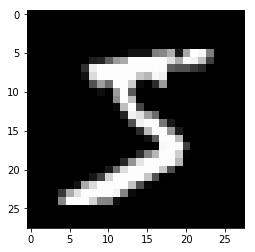

In [42]:
plt.imshow(image1_tr, cmap='gray')